In [9]:
%run init.ipynb  
        
init = InitFolders(folders = ["data", "img", "img/imp", "img/corr", "img/hist1d", "img/hist2d", "img/scatter", "img/overview"], need_install_libs=True)

init.INIT("./")



['Requirement already satisfied: pandas in /Users/vasek/miniconda3/lib/python3.10/site-packages (1.5.2)\n', 'Requirement already satisfied: pytz>=2020.1 in /Users/vasek/miniconda3/lib/python3.10/site-packages (from pandas) (2022.7)\n', 'Requirement already satisfied: numpy>=1.21.0 in /Users/vasek/miniconda3/lib/python3.10/site-packages (from pandas) (1.24.1)\n', 'Requirement already satisfied: python-dateutil>=2.8.1 in /Users/vasek/miniconda3/lib/python3.10/site-packages (from pandas) (2.8.2)\n', 'Requirement already satisfied: six>=1.5 in /Users/vasek/miniconda3/lib/python3.10/site-packages (from python-dateutil>=2.8.1->pandas) (1.16.0)\n']
['Requirement already satisfied: scikit-learn in /Users/vasek/miniconda3/lib/python3.10/site-packages (1.2.0)\n', 'Requirement already satisfied: threadpoolctl>=2.0.0 in /Users/vasek/miniconda3/lib/python3.10/site-packages (from scikit-learn) (3.1.0)\n', 'Requirement already satisfied: joblib>=1.1.1 in /Users/vasek/miniconda3/lib/python3.10/site-pa

In [10]:
%run preprocess.ipynb
%run plot.ipynb
%run imp.ipynb

In [12]:
%run predict.ipynb

In [13]:
import os
from typing import Optional
import pandas as pd
import numpy as np

/var/folders/3b/xyq4srtx5gl95073r1qm5v_w0000gn/T/ipykernel_2462/1282751218.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
/var/folders/3b/xyq4srtx5gl95073r1qm5v_w0000gn/T/ipykernel_2462/1282751218.py:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = self.data.corr()
/var/folders/3b/xyq4srtx5gl95073r1qm5v_w0000gn/T/ipykernel_2462/3720795065.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

distribution 		 --> 		 normal
tol 		 --> 		 0.001
[1658.5111549  1512.89677916 1499.06911653 ... 1645.         1408.
 1500.        ]


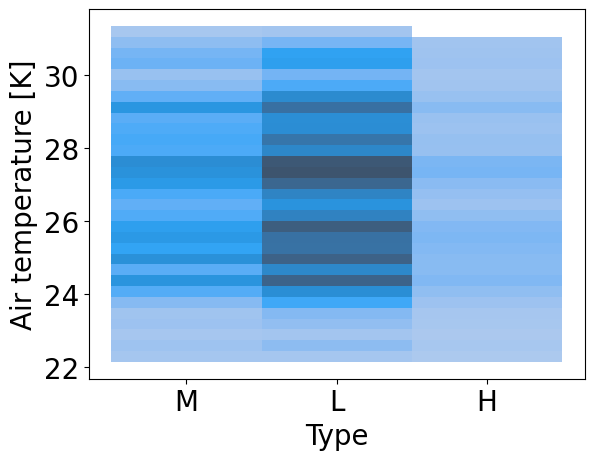

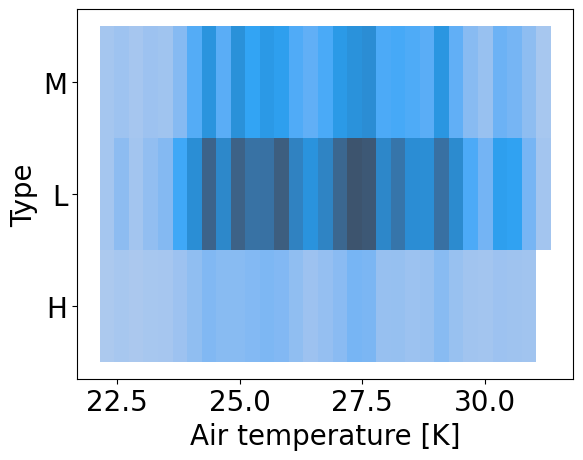

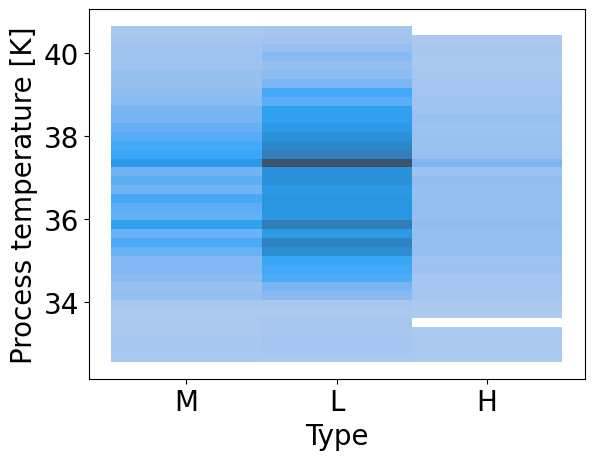

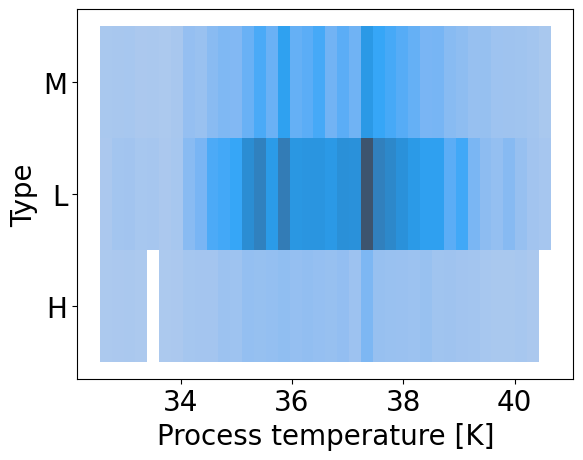

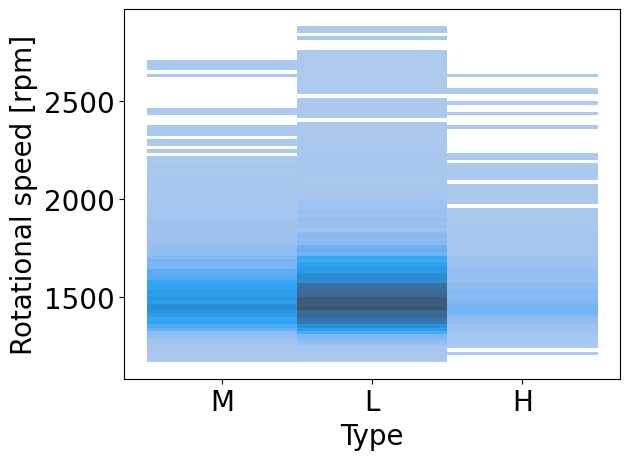

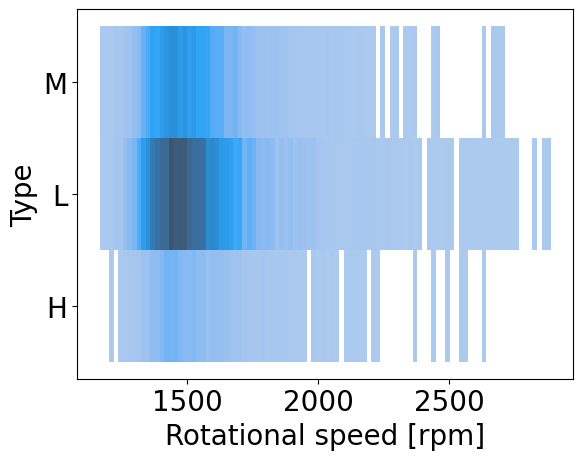

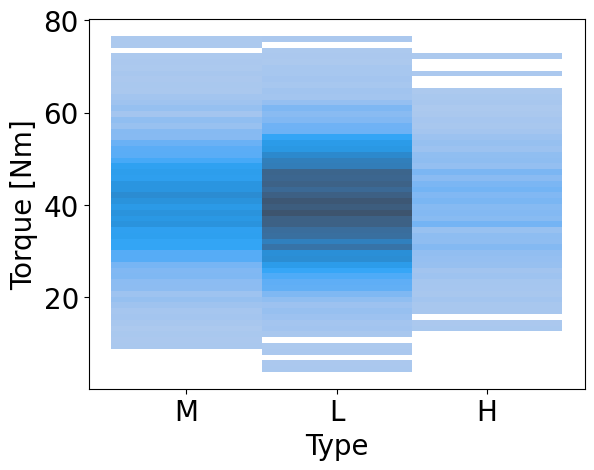

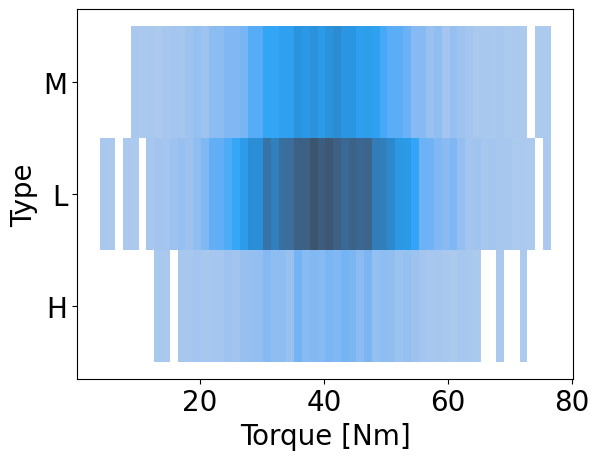

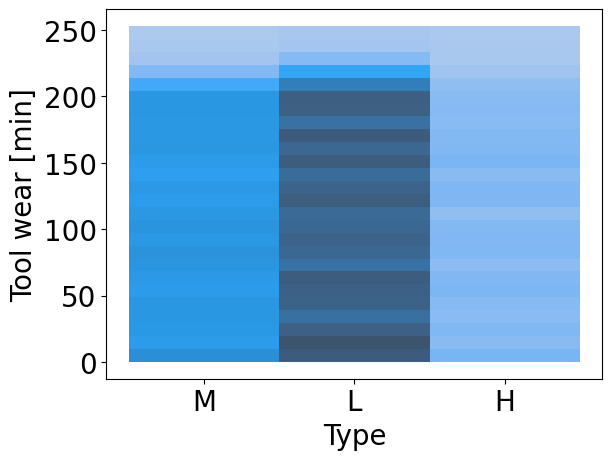

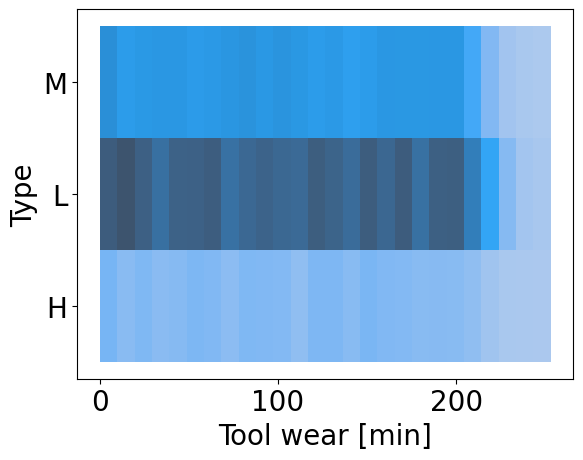

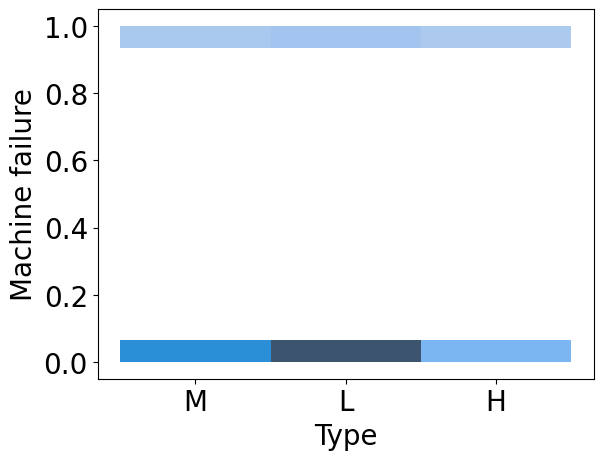

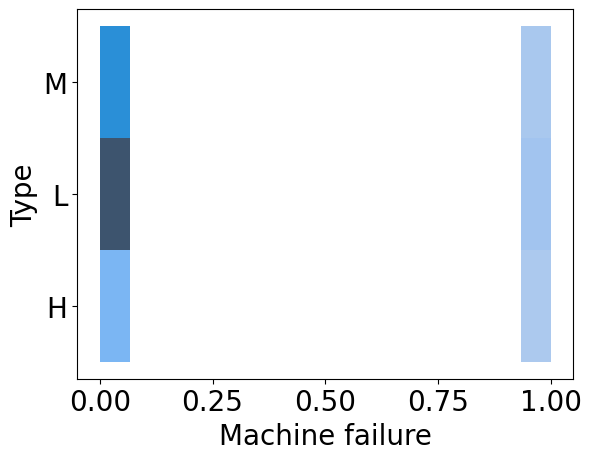

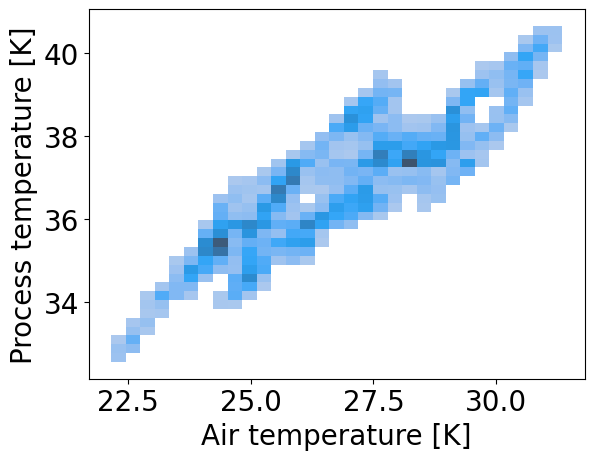

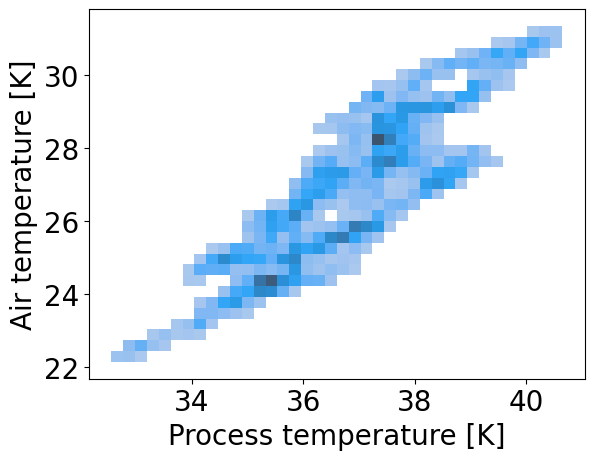

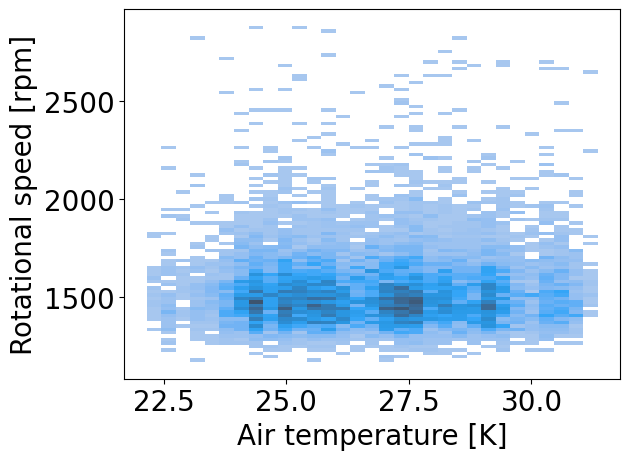

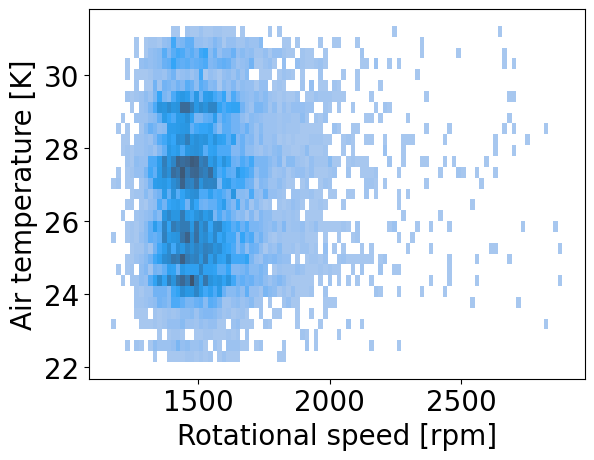

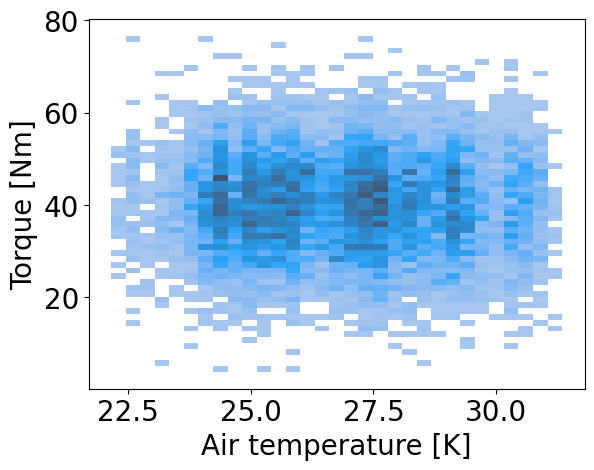

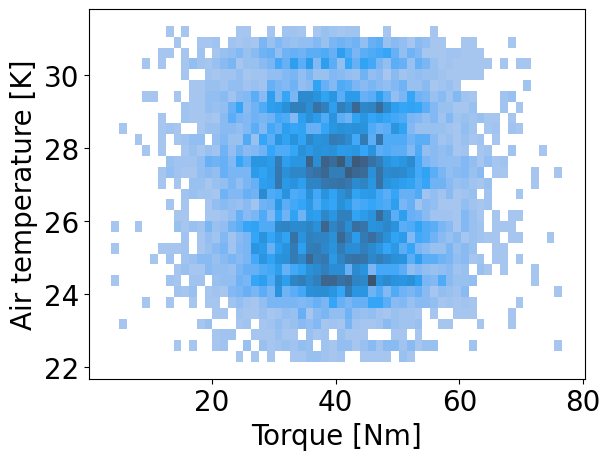

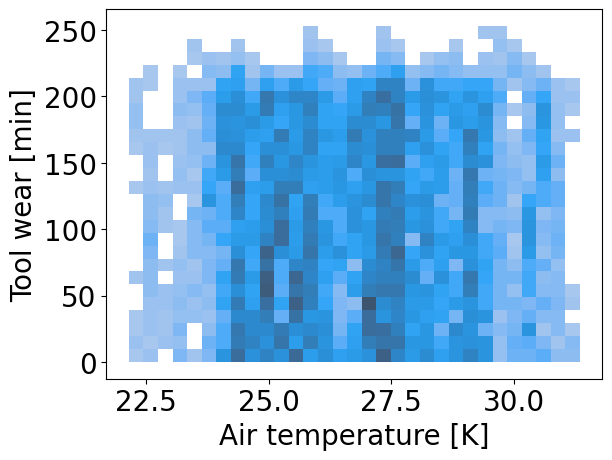

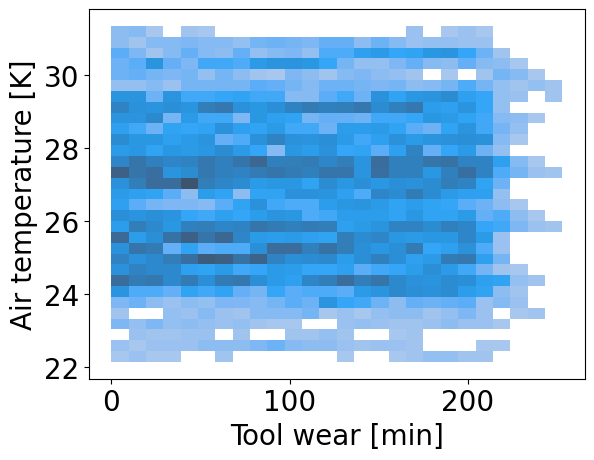

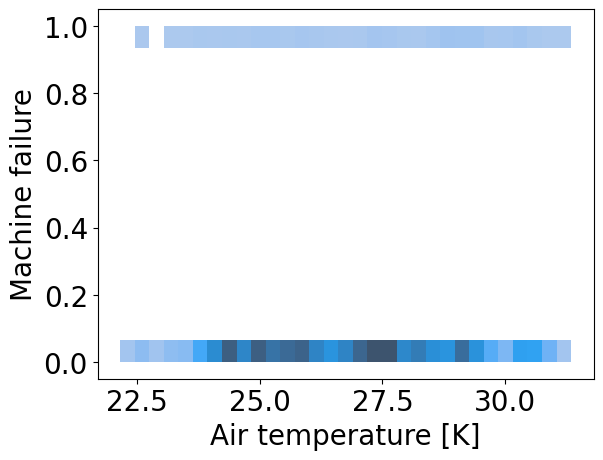

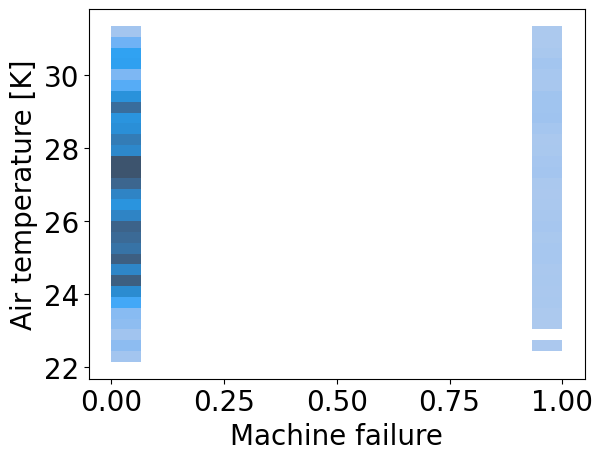

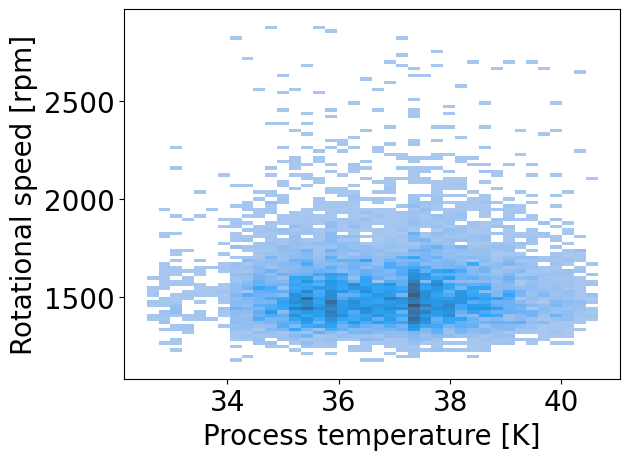

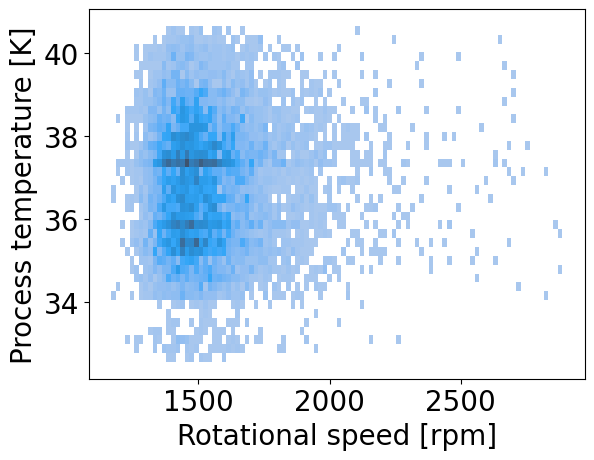

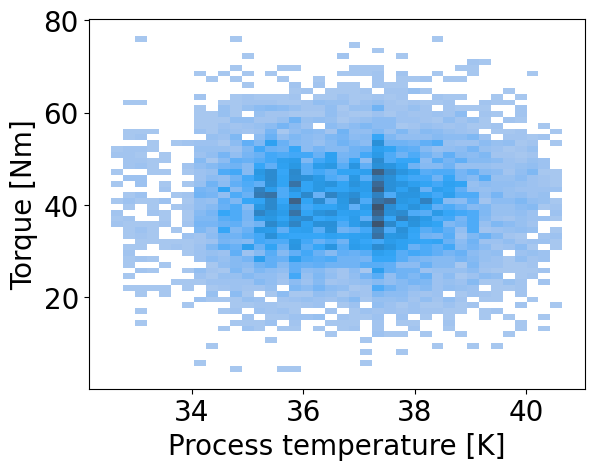

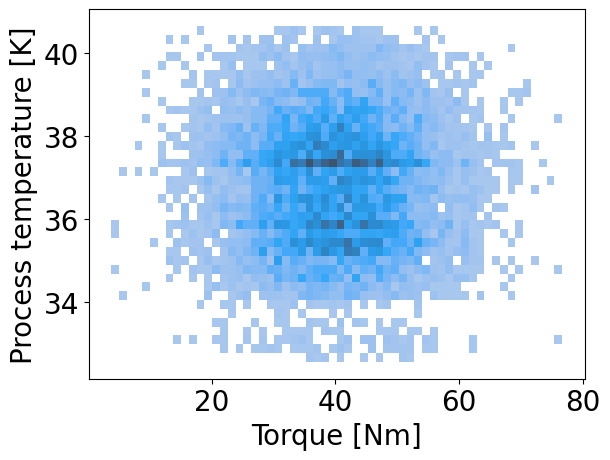

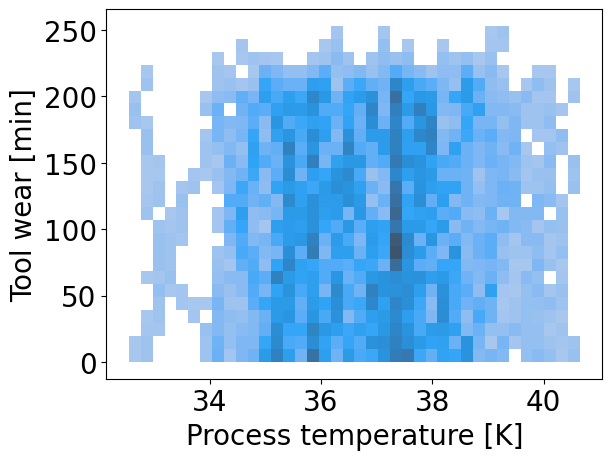

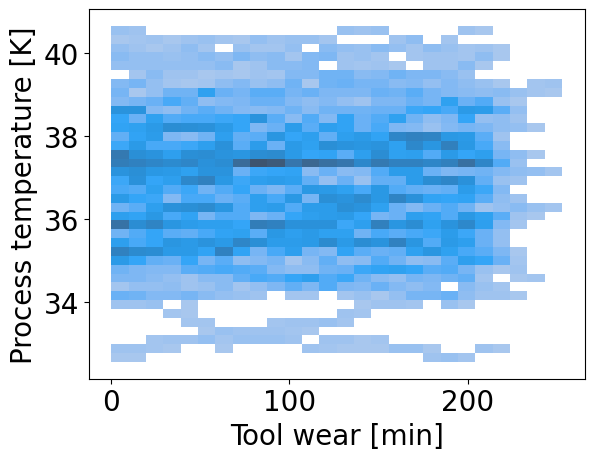

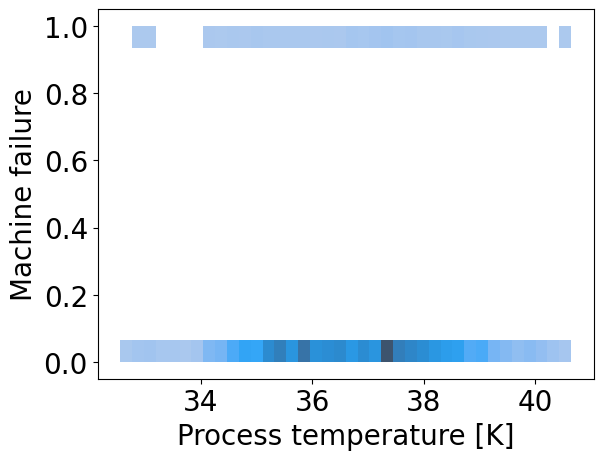

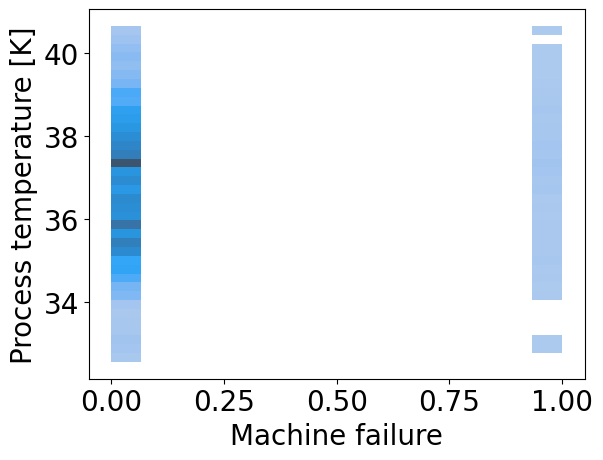

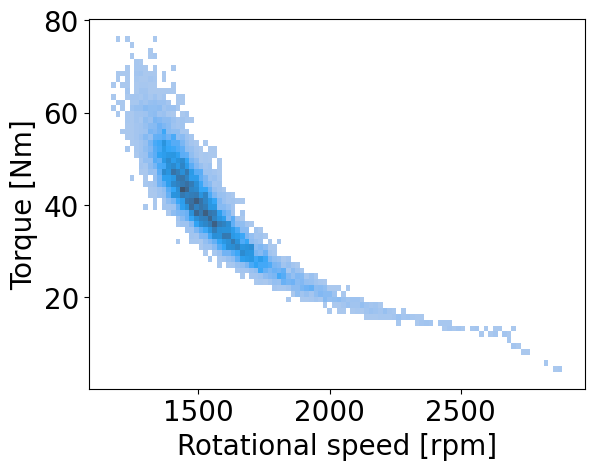

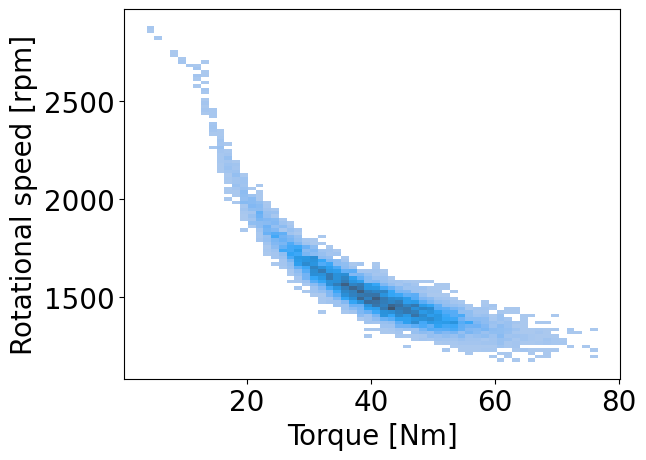

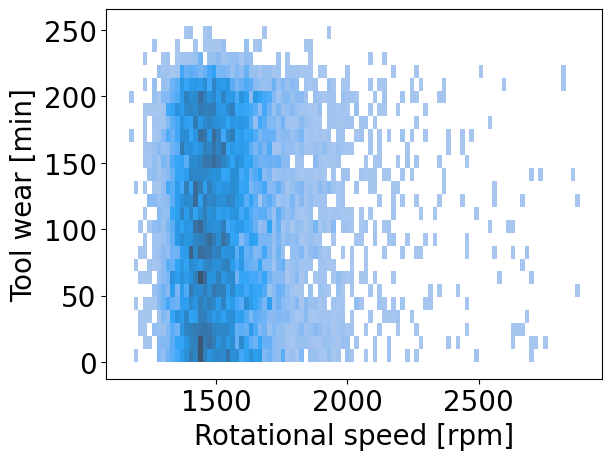

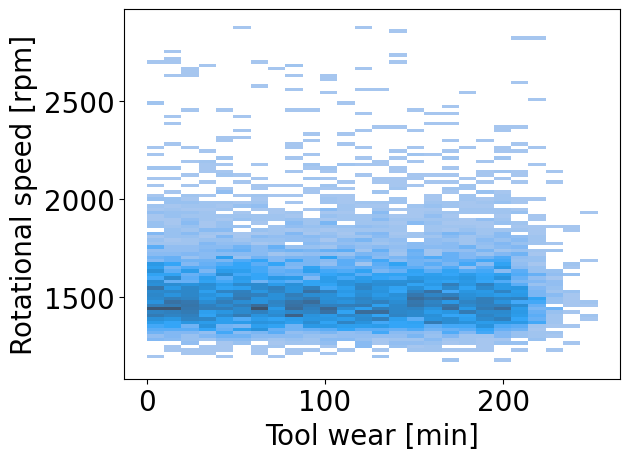

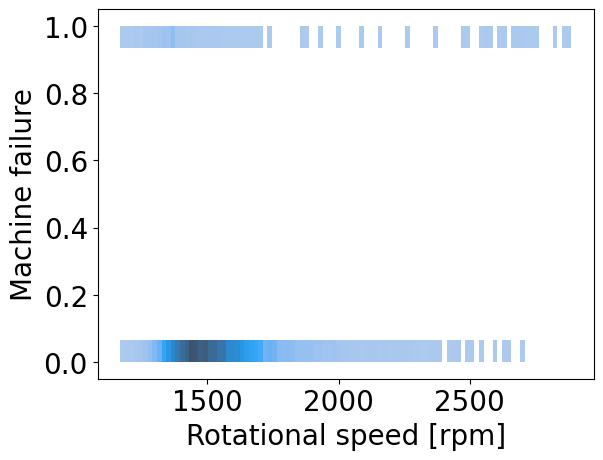

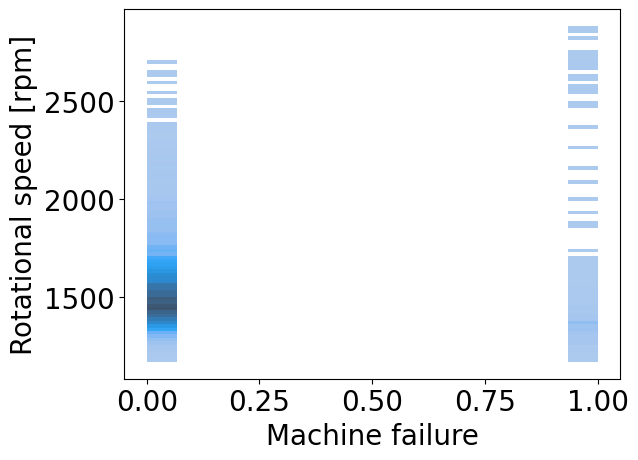

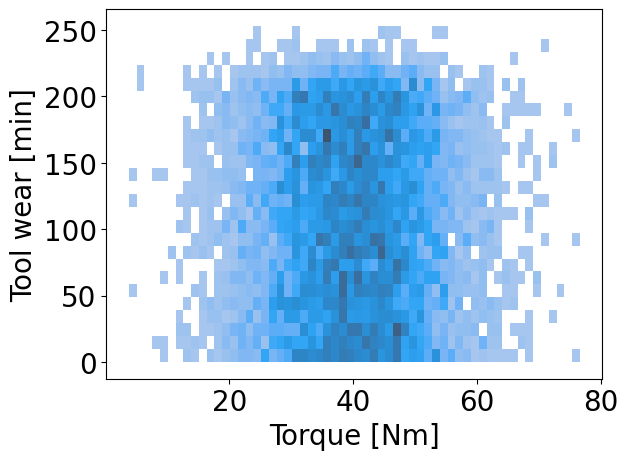

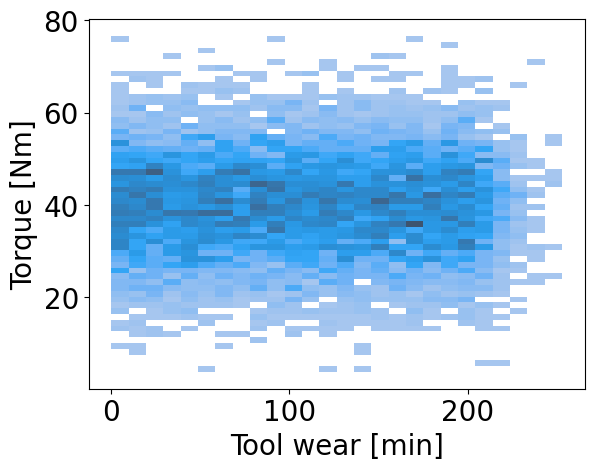

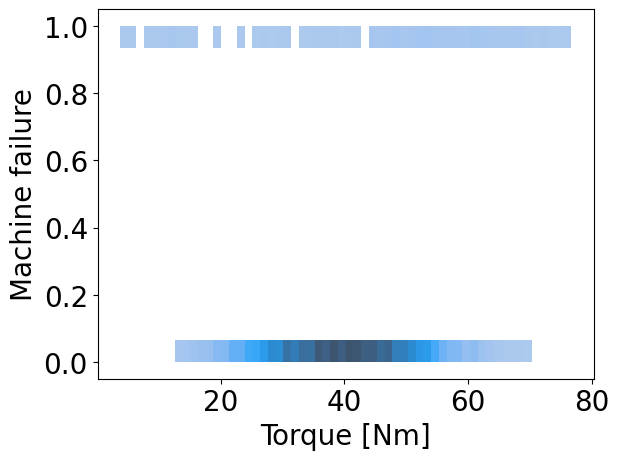

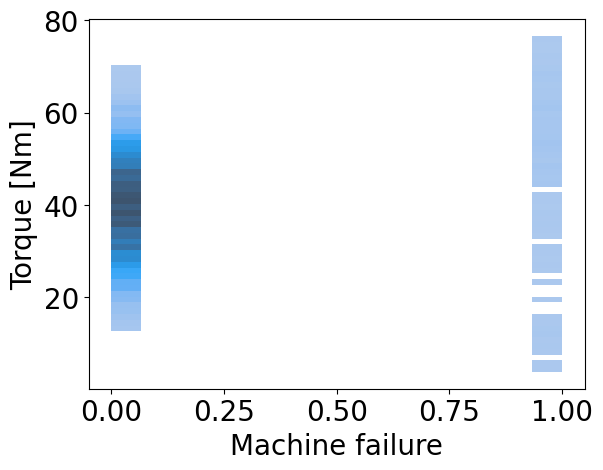

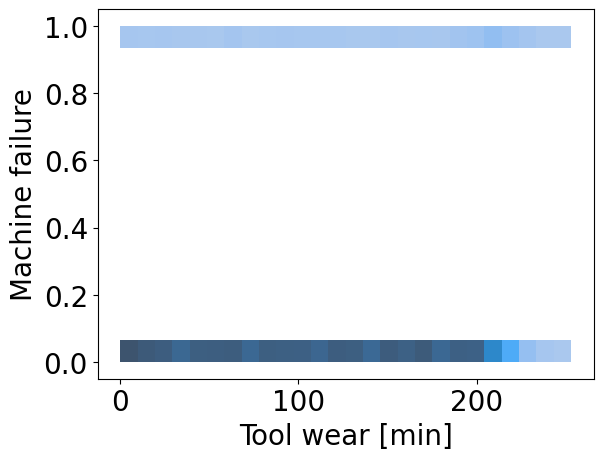

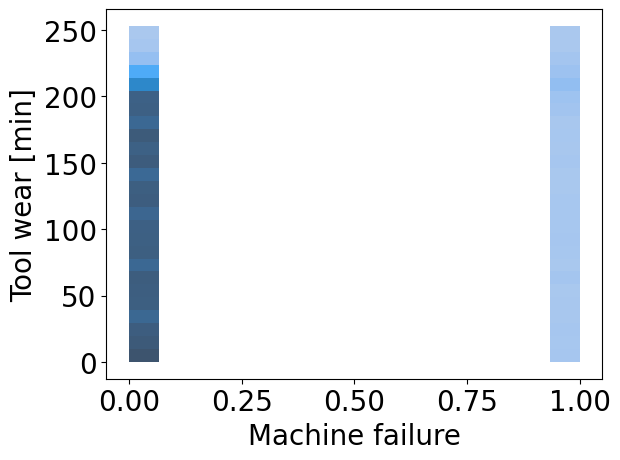

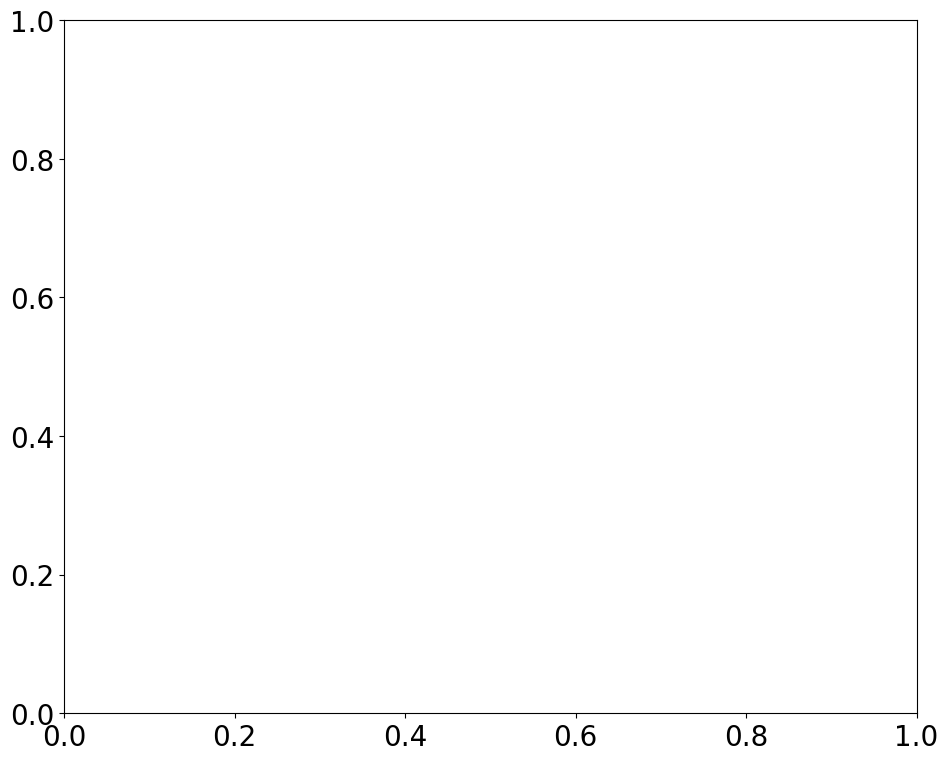

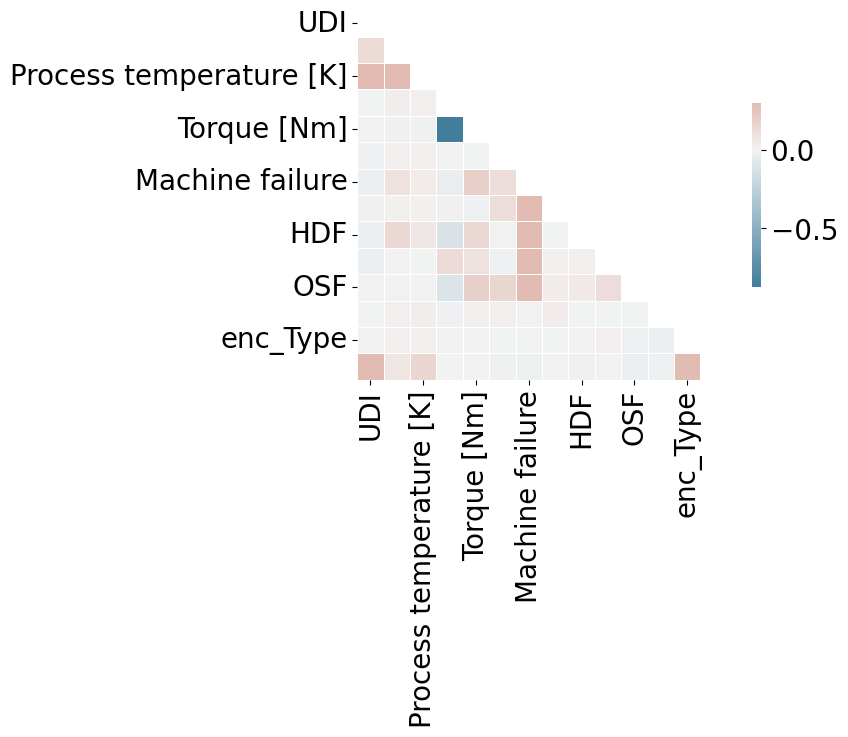

<Figure size 640x480 with 0 Axes>

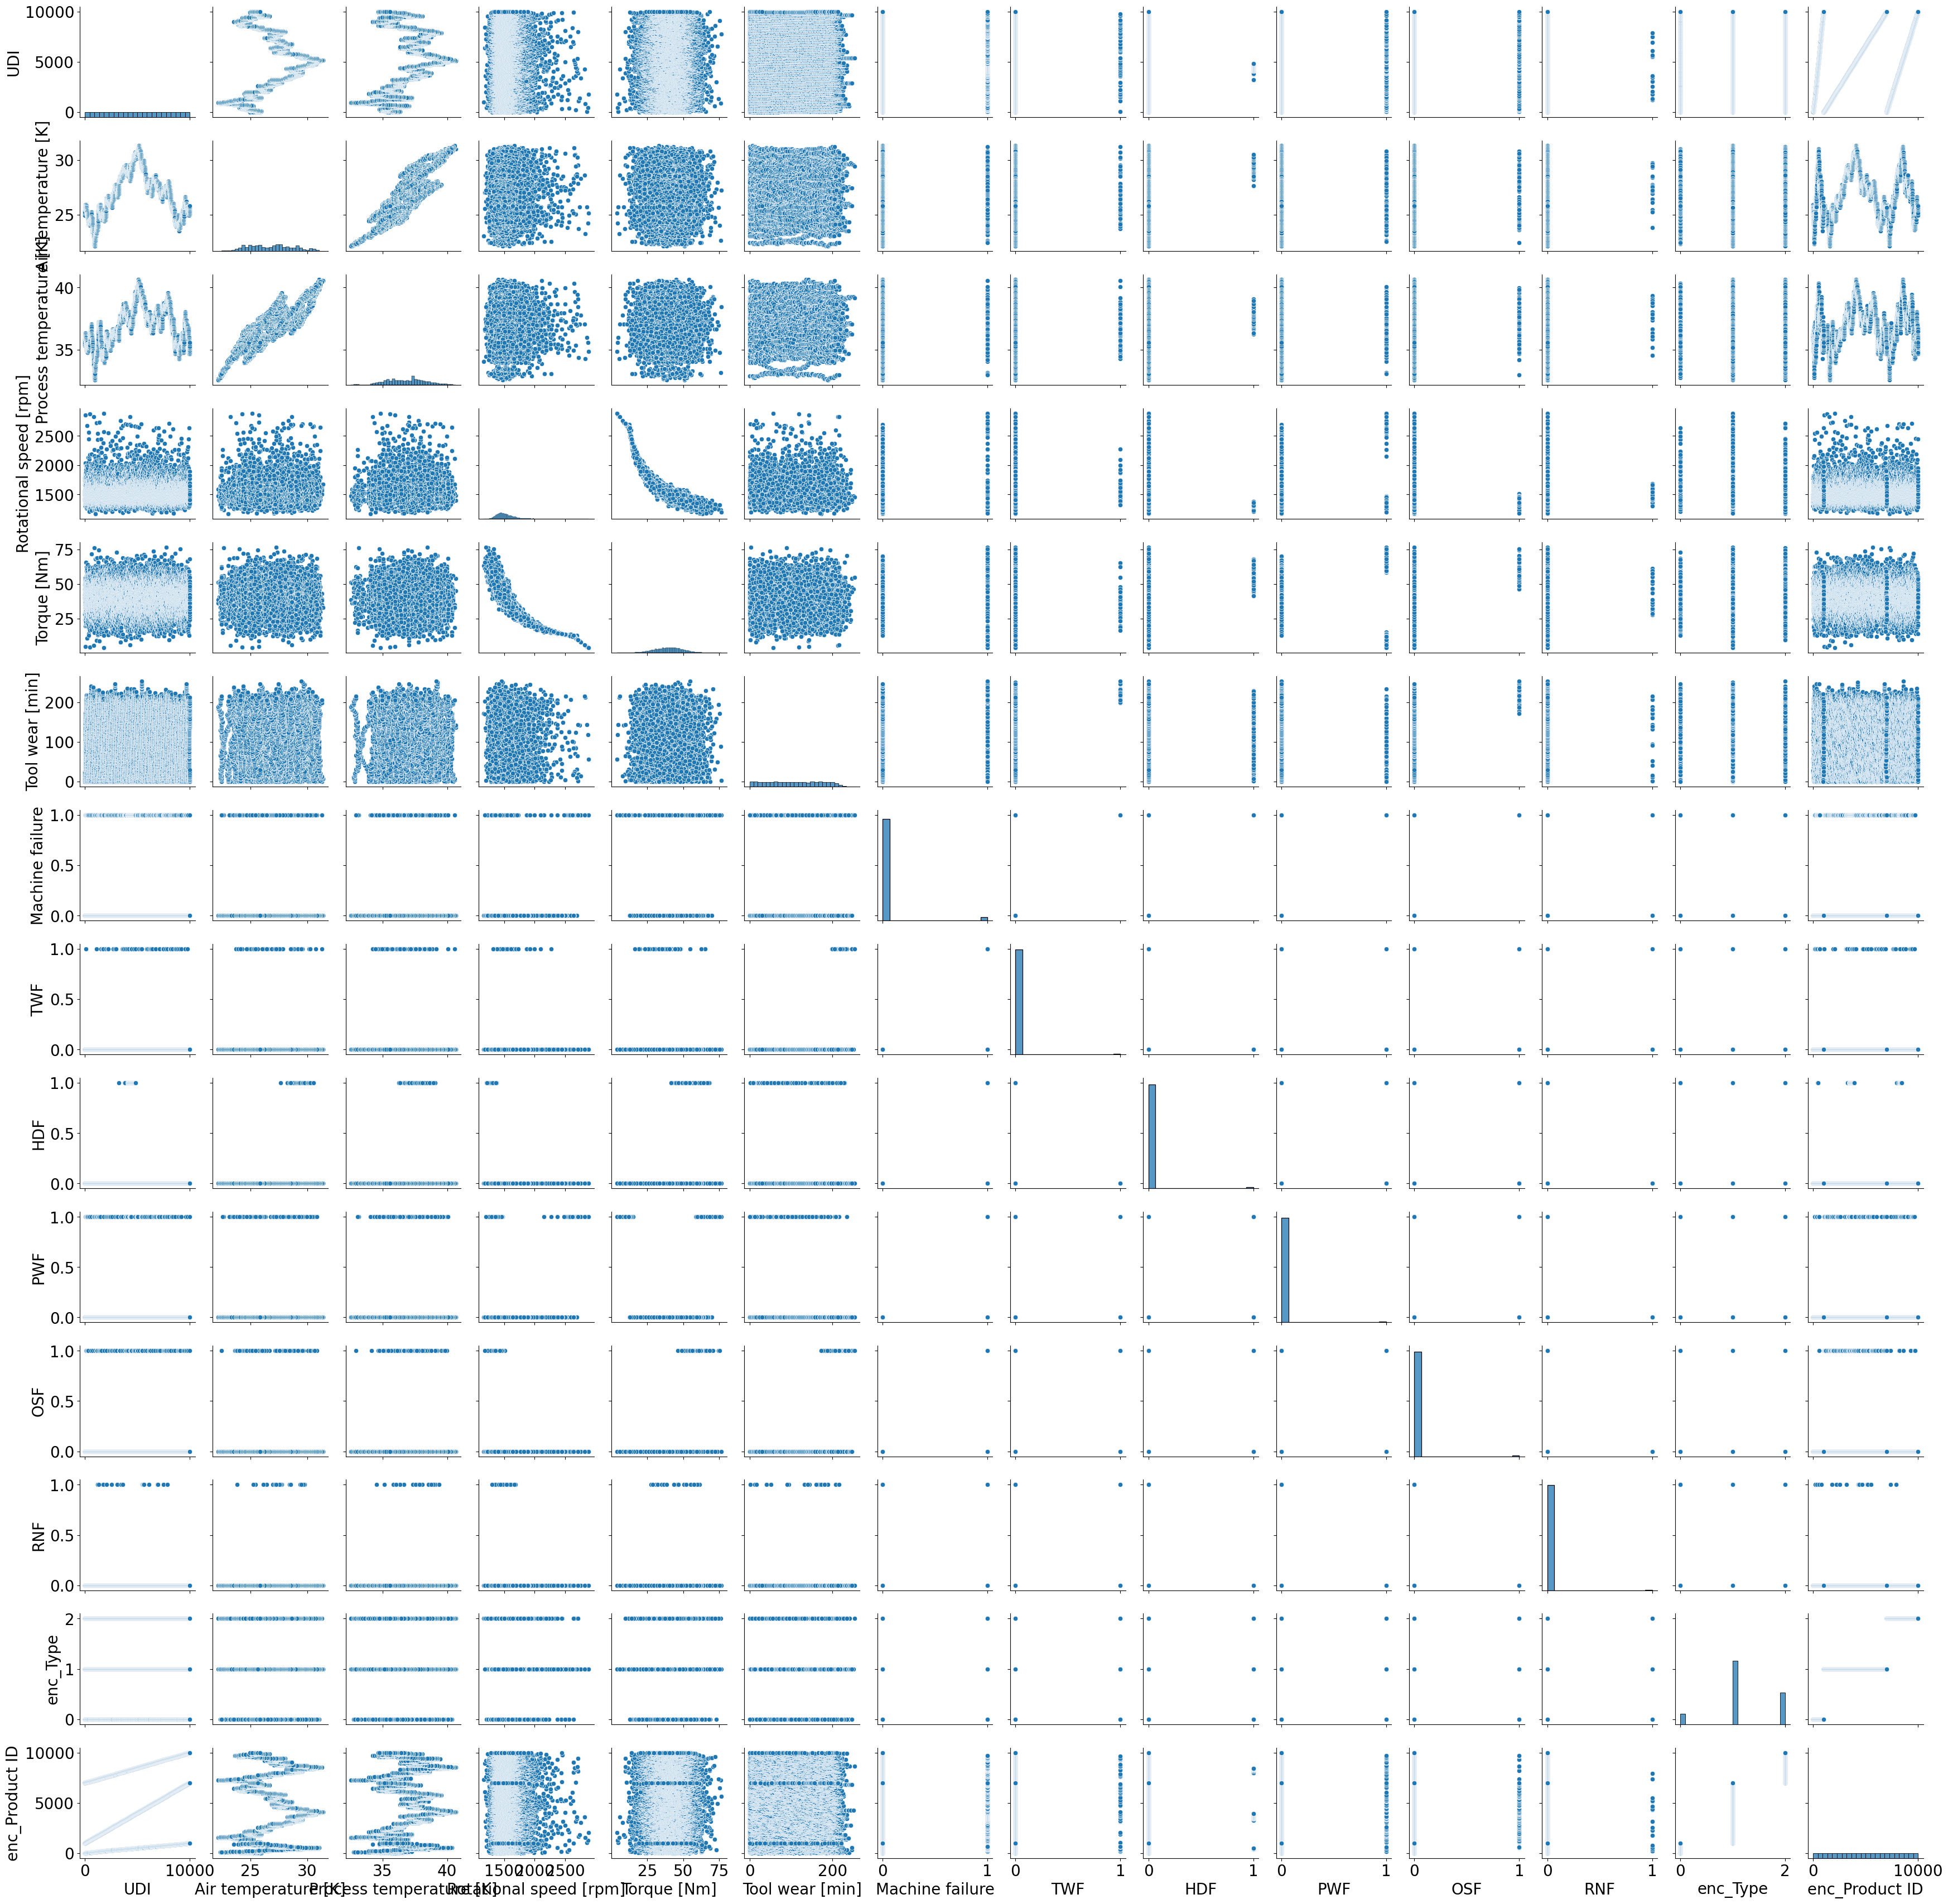

<Figure size 640x480 with 0 Axes>

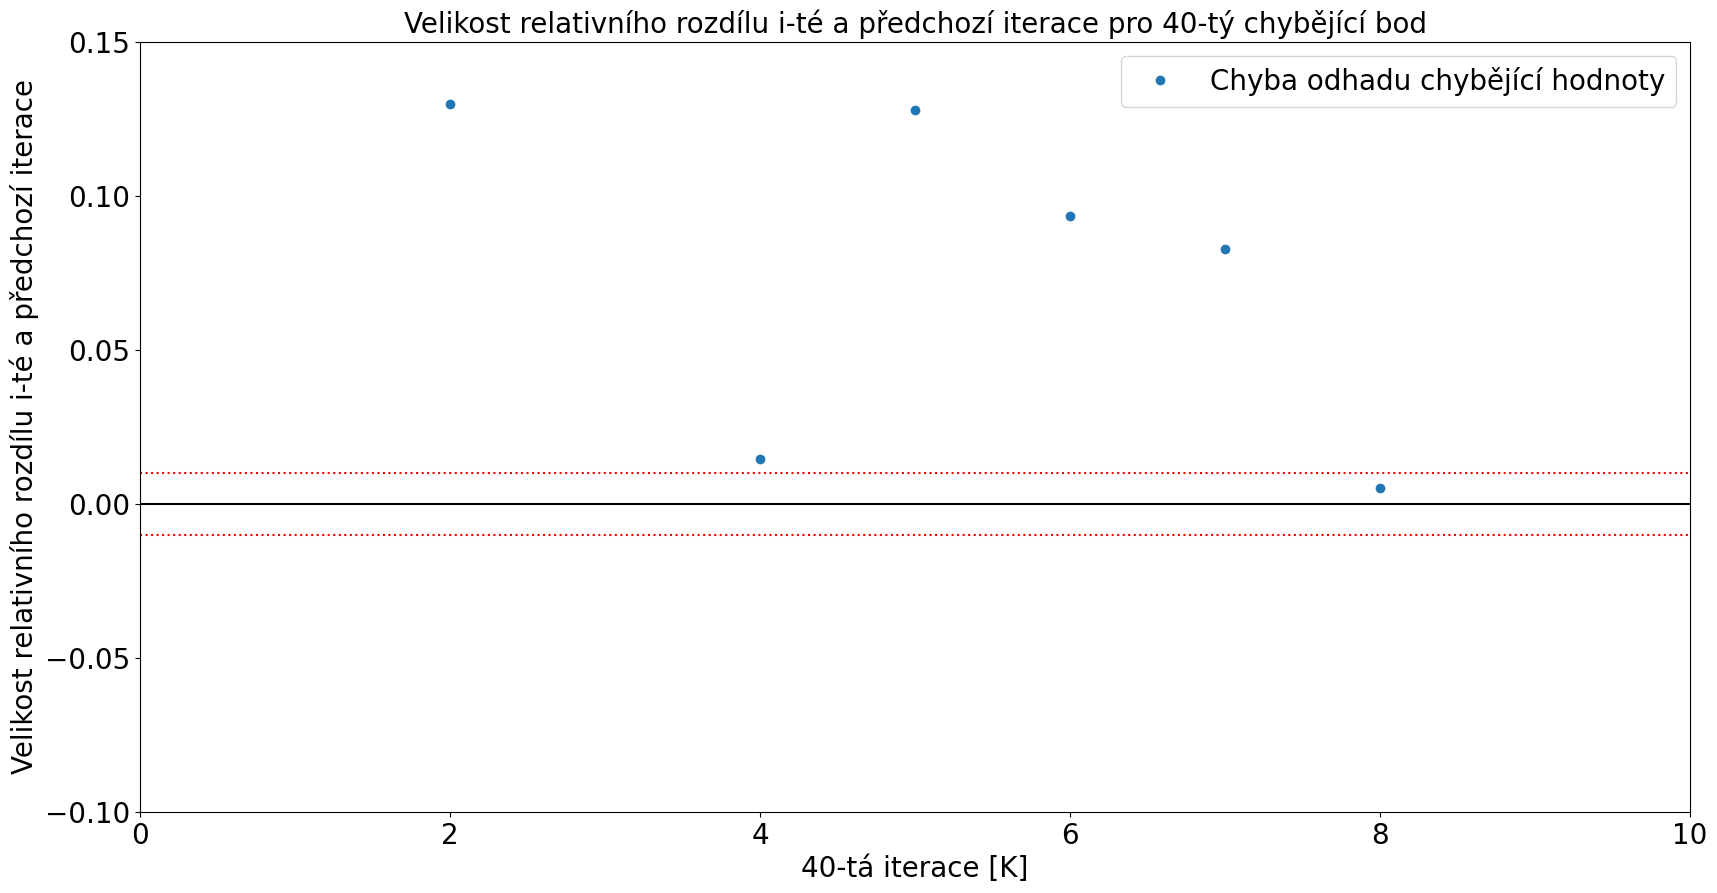

<Figure size 640x480 with 0 Axes>

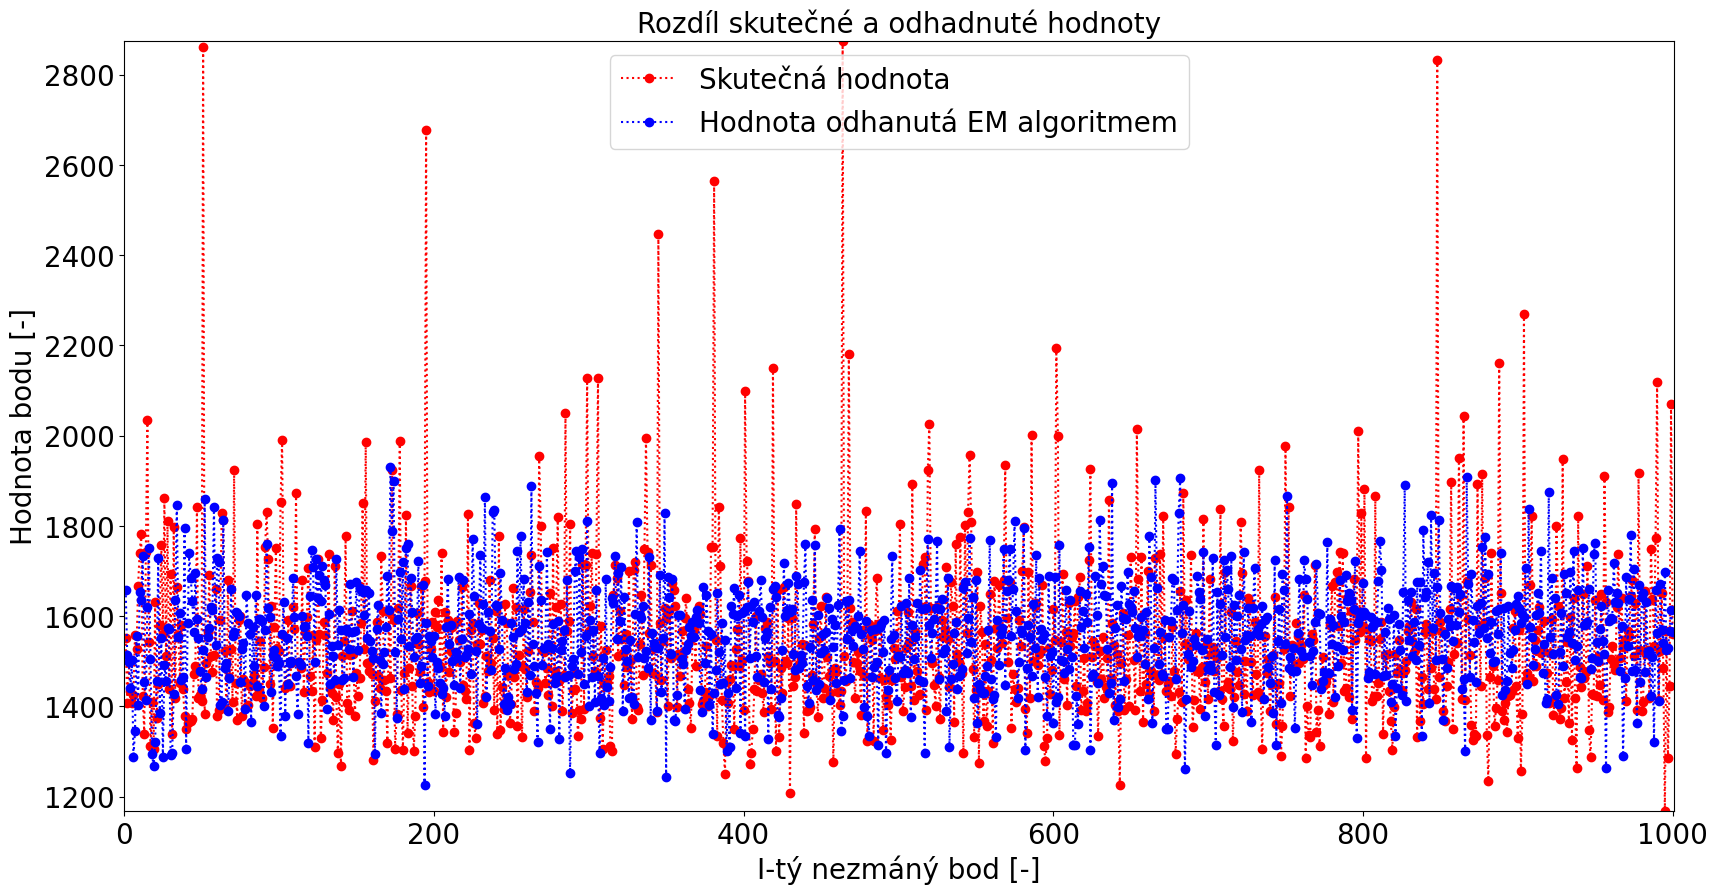

distribution 		 --> 		 normal
tol 		 --> 		 0.001
[27.13189821 26.51365878 28.09115511 ... 25.85       25.85
 25.85      ]


/var/folders/3b/xyq4srtx5gl95073r1qm5v_w0000gn/T/ipykernel_2462/3720795065.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[col][0:num_vals] = pred[0:num_vals]


<Figure size 640x480 with 0 Axes>

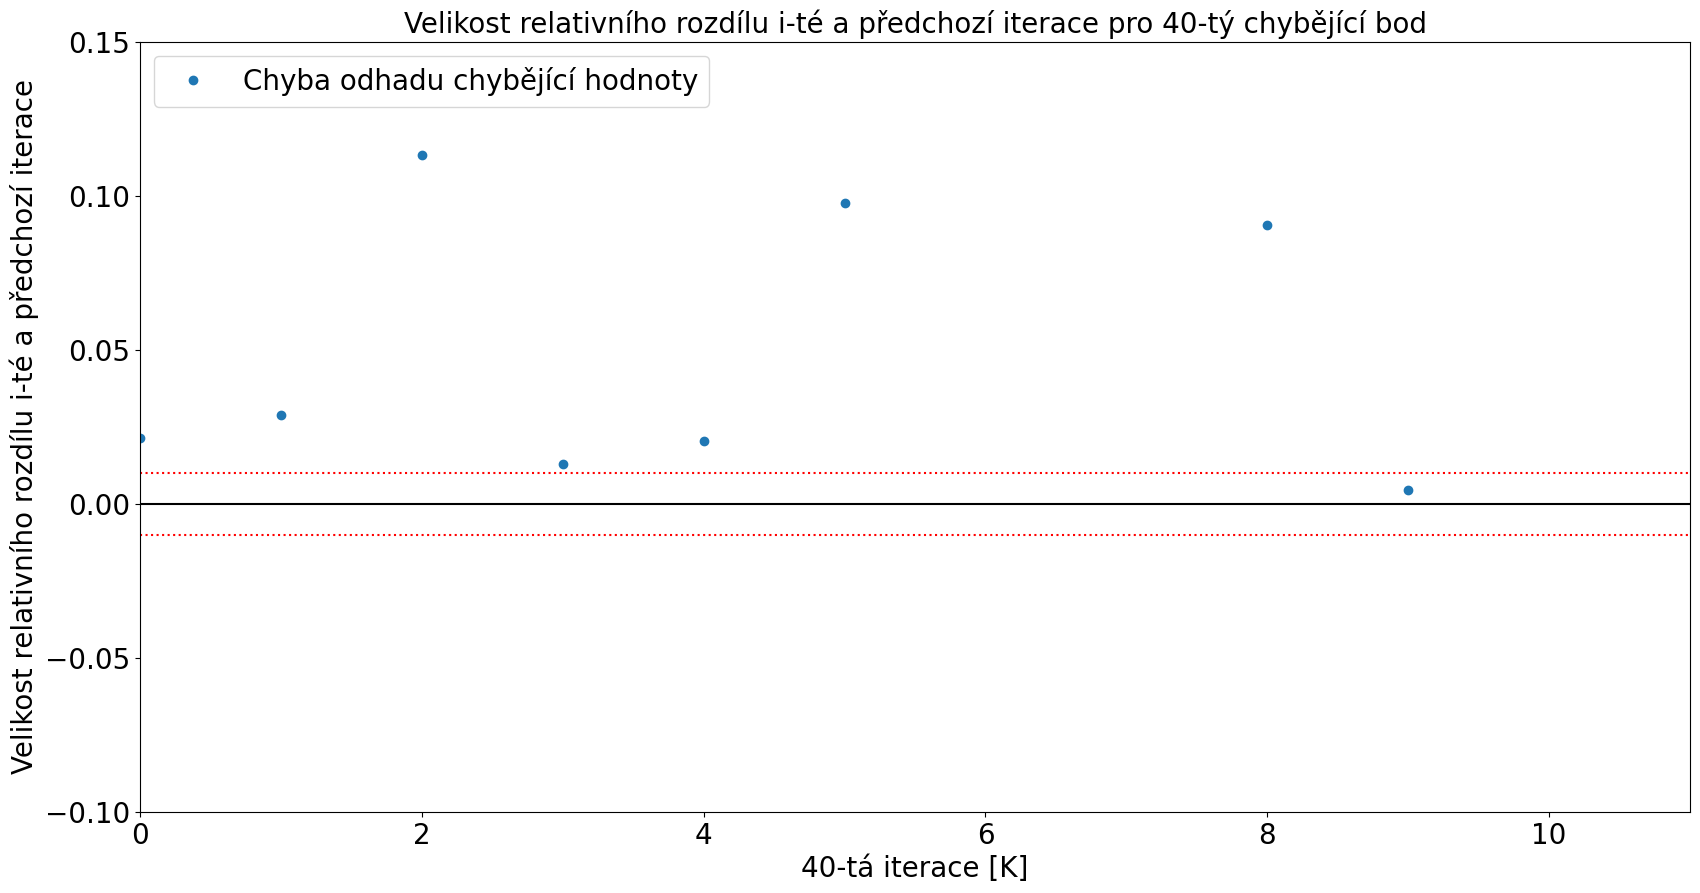

<Figure size 640x480 with 0 Axes>

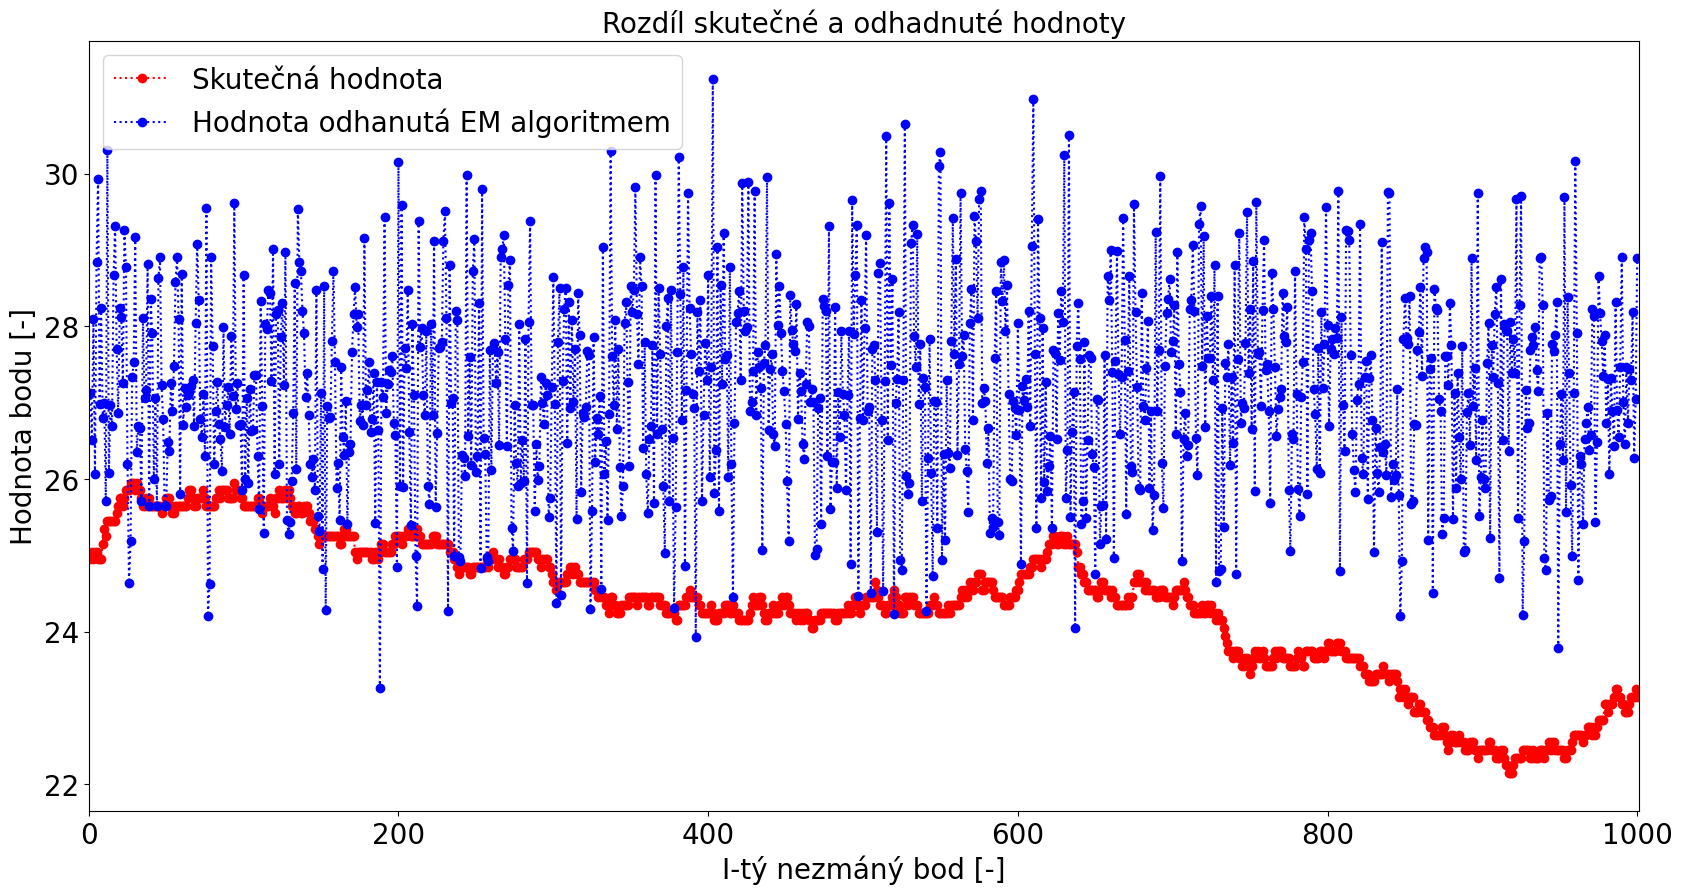

0.9693939393939394


In [14]:

%run imp.ipynb

pp = Preprocess("./ai4i2020.csv")
df = pp.preprocess(
    enc_columns = ['Type', 'Product ID'],
    kelvin_columns = ['Air temperature [K]', 'Process temperature [K]']
)


explo = ExplorationPlot(data = df)



explo._create_exploration_report(
                                plot_2d_names = [
                                                'Type', 'Air temperature [K]', 'Process temperature [K]',
                                                'Rotational speed [rpm]', 'Torque [Nm]',                                
                                                'Tool wear [min]', 'Machine failure'
                                                ],
                                save_plot_1d = True,
                                save_plot_2d = True,
                                save_plot_corr = True,
                                save_plot_overview = True
                            )



imp = Impute(
            data = df, 
            columns = ['Rotational speed [rpm]', 'Air temperature [K]'], 
            ITER_TO_PLOT = 40
        )
       
pred, data = imp.impute_cols(distribution = "normal", num_vals = 1000)


data = data[[
    'Air temperature [K]', 
    'Machine failure', 
    'Torque [Nm]', 
    'Tool wear [min]', 
    'Rotational speed [rpm]',
    'enc_Type',
    'enc_Product ID',
    'Process temperature [K]'
    ]]

data.head()



c = Classification(
                    data = data,
                    x_cols = [
                            'Air temperature K', 
                            'Machine failure', 
                            'Torque Nm', 
                            'Tool wear min', 
                            'Rotational speed rpm',
                            'enc_Type',
                            'enc_Product ID',
                            'Process temperature K'
                            ],
                    y_col = 'Machine failure'  
                )

y, dummy, x, xgb_probas = c._classify()
